In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from read_data import read_flows_imgs
from flow_algo import warp_img, flow_to_color
from metrics import ssd_error, img_norm_diff

Warping
==

In [3]:
all_flows, all_imgs = read_flows_imgs(
    flow_patterns = ['data/{0:0>7}-gt.flo', 'data/flownets-pred-{0:0>7}.flo'],
    img_patterns = ['data/{0:0>7}-img0.ppm', 'data/{0:0>7}-img1.ppm'],
    n = 8)
flow_labels = ['Ground truth', 'FlowNet 1']

In [4]:
pat_num = 5 # number of image pair
imgs = all_imgs[pat_num]
flows = all_flows[pat_num]

flow_num = 0 # number of flow (truth, flownet, etc)
flow = flows[flow_num]

In [5]:
warps = []
warps.append((warp_img(imgs[1], flow, forward = False, over_from_points = True, init_zeros = True),
              'Backward, over from-points, 0-init', 0)) # traditional
warps.append((warp_img(imgs[1], flow, forward = False, over_from_points = True, init_zeros = False),
              'Backward, over from-points, img-init', 0))
warps.append((warp_img(imgs[1], flow, forward = False, over_from_points = False, init_zeros = True),
              'Backward, over to-points, 0-init', 0))
warps.append((warp_img(imgs[1], flow, forward = False, over_from_points = False, init_zeros = False),
              'Backward, over to-points, img-init', 0))
warps.append((warp_img(imgs[0], flow, forward = True, over_from_points = True, init_zeros = True),
              'Forward, over from-points, 0-init', 1))
warps.append((warp_img(imgs[0], flow, forward = True, over_from_points = True, init_zeros = False),
              'Forward, over from-points, img-init', 1))
warps.append((warp_img(imgs[0], flow, forward = True, over_from_points = False, init_zeros = True),
              'Forward, over to-points, 0-init', 1))
warps.append((warp_img(imgs[0], flow, forward = True, over_from_points = False, init_zeros = False),
              'Forward, over to-points, img-init', 1))

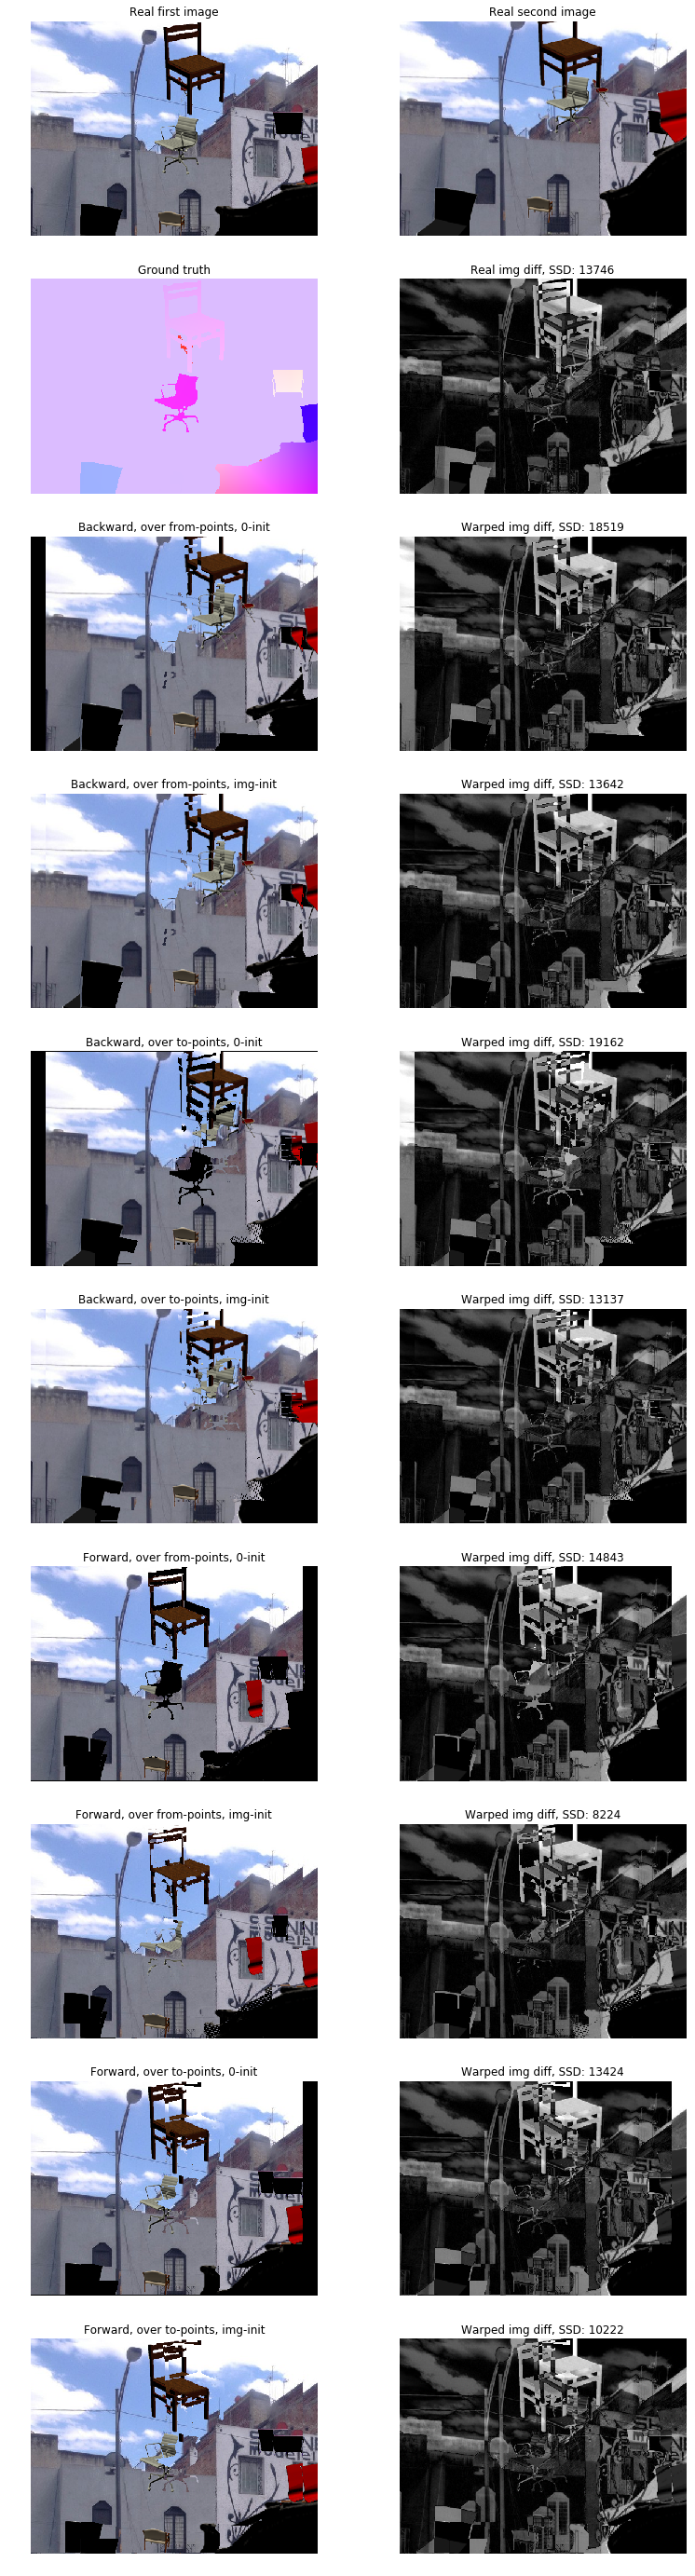

In [9]:
num_rows = len(warps) + 2
num_cols = 2
fig = plt.subplots(num_rows, num_cols, figsize = (13, 5 * num_rows))

plt.subplot(num_rows, num_cols, 1)
ax = plt.axis('off')
plt.title('Real first image')
shown_img = plt.imshow(imgs[0])

plt.subplot(num_rows, num_cols, 2)
ax = plt.axis('off')
plt.title('Real second image')
shown_img = plt.imshow(imgs[1])

plt.subplot(num_rows, num_cols, 3)
plt.axis('off')
plt.title(flow_labels[flow_num])
shown_img = plt.imshow(flow_to_color(flow))

plt.subplot(num_rows, num_cols, 4)
plt.axis('off')
plt.title('Real img diff, SSD: {:.0f}'.format(ssd_error(imgs)))
shown_img = plt.imshow(img_norm_diff(imgs), cmap = 'gray')

for i in xrange(len(warps)):
    plt.subplot(num_rows, num_cols, 2 * (i + 2) + 1)
    ax = plt.axis('off')
    plt.title(warps[i][1])
    shown_img = plt.imshow(warps[i][0])
    
    plt.subplot(num_rows, num_cols, 2 * (i + 3))
    ax = plt.axis('off')
    plt.title('Warped img diff, SSD: {:.0f}'.format(ssd_error([imgs[0], warps[i][0]])))
    shown_img = plt.imshow(img_norm_diff([imgs[warps[i][2]], warps[i][0]]), cmap = 'gray')